Install pytorch and other dependencies. then,

In [26]:
!pip install -e ..

Obtaining file:///home/rave/megaseg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: megaseg
    Found existing installation: megaseg 0.0.1
    Uninstalling megaseg-0.0.1:
      Successfully uninstalled megaseg-0.0.1
  Running setup.py develop for megaseg


In [1]:
from os import path
import numpy as np
from megaseg.data import MegapixelMNIST
import skimage as sk

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [21]:

import numpy as np
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
import skimage.transform as transform

class MegapixelMNIST(MNIST):
    """Load a Megapixel MNIST dataset. See make_mnist.py."""

    CLASSES = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    def __init__(self, mega_size, resize, *args, **kwargs):
        
        super().__init__(*args, **kwargs)
        self.big_size = mega_size
        self.big_shape = (mega_size, mega_size)
        self.resize = resize
        if self.resize*28 > self.big_size-28:
            raise ValueError("""The resize parameter cannot be so large 
            that the 28x28 image is made larger than the big image shape - 28.""")
        
    def __getitem__(self, i):
        
        small_img, small_target = MNIST.__getitem__(self, i)
        assert torch.is_tensor(small_img)
        small_img = transform.resize(small_img.squeeze(), 
                                     (small_img.squeeze().shape[0] * self.resize, 
                                      small_img.squeeze().shape[1] * self.resize),
                                     anti_aliasing=True)
        # Placeholders
        big_img = np.zeros(self.big_shape, dtype=np.float32)-1
        # Fill the sparse representations
        small_indices = np.argwhere(small_img)
        xoffset = np.random.randint(0, self.big_size-28*self.resize)
        yoffset = np.random.randint(0, self.big_size-28*self.resize)
        big_img[yoffset:yoffset+small_img.shape[0], xoffset:xoffset+small_img.shape[1]] = small_img
        big_img = torch.from_numpy(big_img)
        # big_img = self.image_transform(big_img)
        label = np.where(big_img>-1, 1, 0)
        return big_img, label

In [22]:
big_mnist = MegapixelMNIST(root='data', 
              train=True, 
              download= True,
              mega_size = 300,
              resize = 4,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

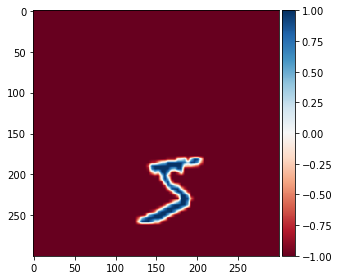

In [23]:
sk.io.imshow(big_mnist[0][0].cpu().numpy())


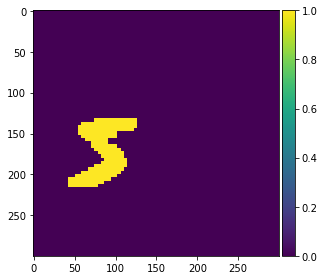

In [24]:
sk.io.imshow(big_mnist[0][1])

Need to sparsify training and test sets

In [ ]:
data = sparsify(training)

In [ ]:
output_directory="data/megaMNIST"

api for old keras based megapixel mnist

In [ ]:
# Write the test set
test = MegapixelMNIST(
    N=args.n_test,
    train=False,
    W=args.width,
    H=args.height,
    scale=args.scale,
    noise=args.noise,
    seed=args.dataset_seed
)
data = sparsify(test)
np.save(path.join(args.output_directory, "test.npy"), data)

In [ ]:
img, label = mnist[0]
print('Label: ', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

In [ ]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    plt.imshow(img_batch[0][0], cmap='gray')
    print(label_batch)
    break